In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xlZ29zZXMvTGlicmFyeS9DbG91ZFN0b3JhZ2UvT25lRHJpdmUtQllVLUlkYWhvL1BIMTM1L3RleHRib29rL2NoYXB0ZXJz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

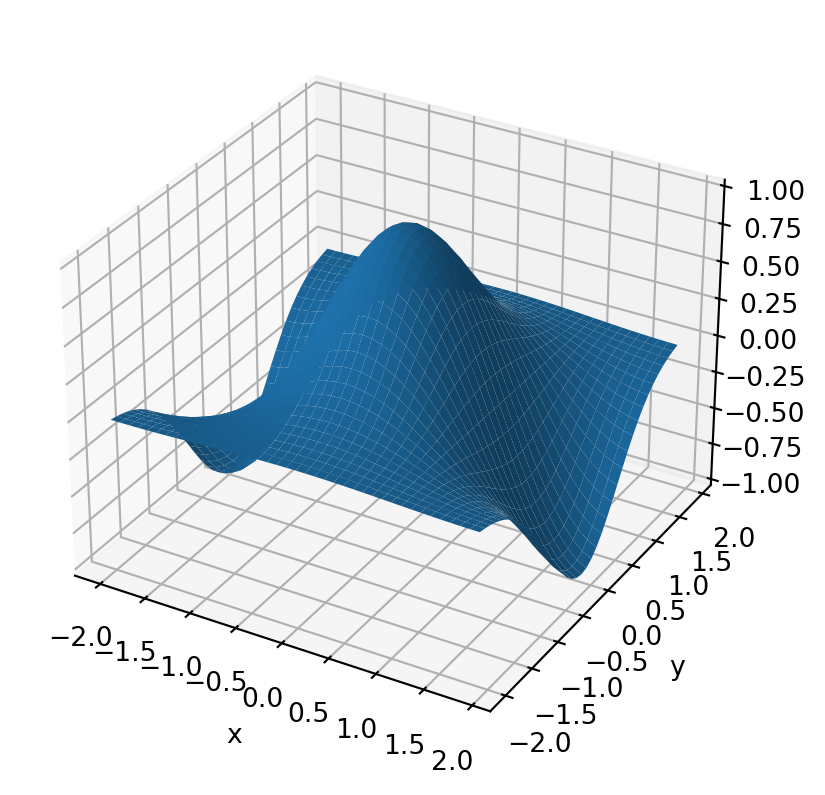

In [2]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  #<- You need this to make 3D plots
# Define the arrays x and y
# Don't make the step size too small or you will kill the
# system (you have a large, but finite amount of memory)
x=arange(-2,2,0.1)
y=arange(-2,2,0.1)
# Use meshgrid to convert these 1-d arrays into 2-d matrices
# of x and y values over the plane
X,Y=meshgrid(x,y)
#X,Y=mgrid[-1:1:0.1,0:1.5:0.1]  # You could also do this in place of meshgrid
# Get F(x,y) by using F(X,Y).
# rather than with x and y
F=cos(pi/2*X)*exp(-Y**2)
# Plot the function
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,F)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#| eval: false
ax=pyplot.axes(projection='3d')  # Set the axes to be 3 dimensional

In [4]:
from numpy import meshgrid
x = [1,2,3]
y = [4,5]

X,Y = meshgrid(x,y)
print(X)
print(Y)

[[1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]]


In [5]:
from numpy import mgrid

X,Y = mgrid[1:4,4:6]
print(X)
print(Y)


X,Y = mgrid[1:4:0.5,4:6:0.5]  
print(X)
print(Y)


X,Y = mgrid[1:4:10j,4:6:10j] 
print(X)
print(Y)

[[1 1]
 [2 2]
 [3 3]]
[[4 5]
 [4 5]
 [4 5]]
[[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]
 [3.  3.  3.  3. ]
 [3.5 3.5 3.5 3.5]]
[[4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
  1.33333333 1.33333333 1.33333333 1.33333333]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
  1.66666667 1.66666667 1.66666667 1.66666667]
 [2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.        ]
 [2.33333333 2.33333333 2.33333333 2.33333333 2.33333333 2.33333333
  2.33333333 2.33333333 2.33333333 2.33333333]
 [2.66666667 2.66666667 2.66666667 2.66666667 2.66666667 2.66666667
  2.66666667 2.66666667 2.66666667 2.66666667]
 [3.         3.         3.         3.         3.    

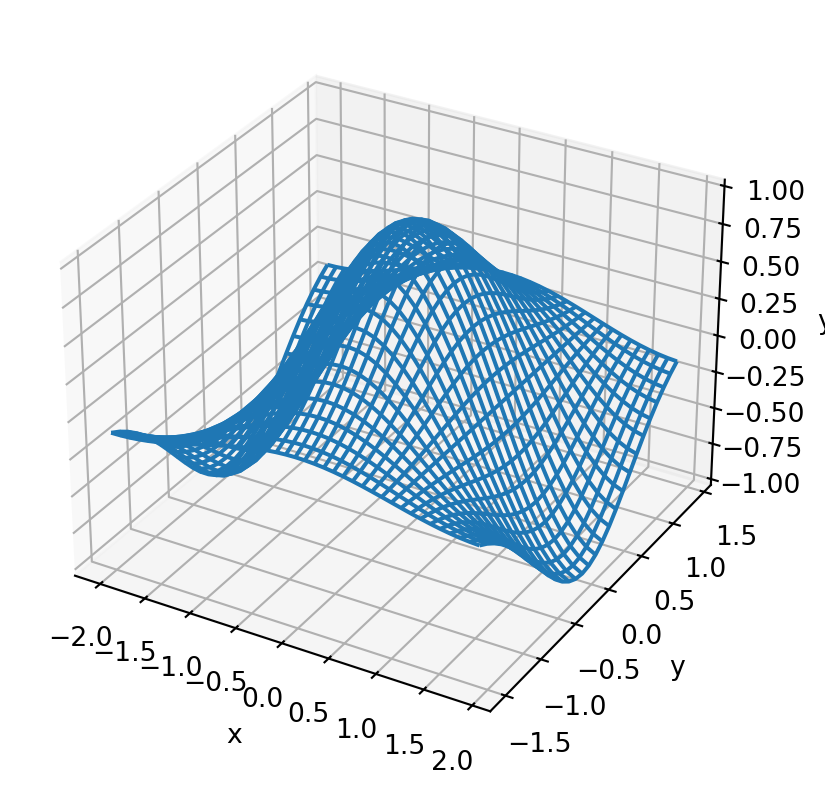

In [6]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,F)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('y')
plt.show()

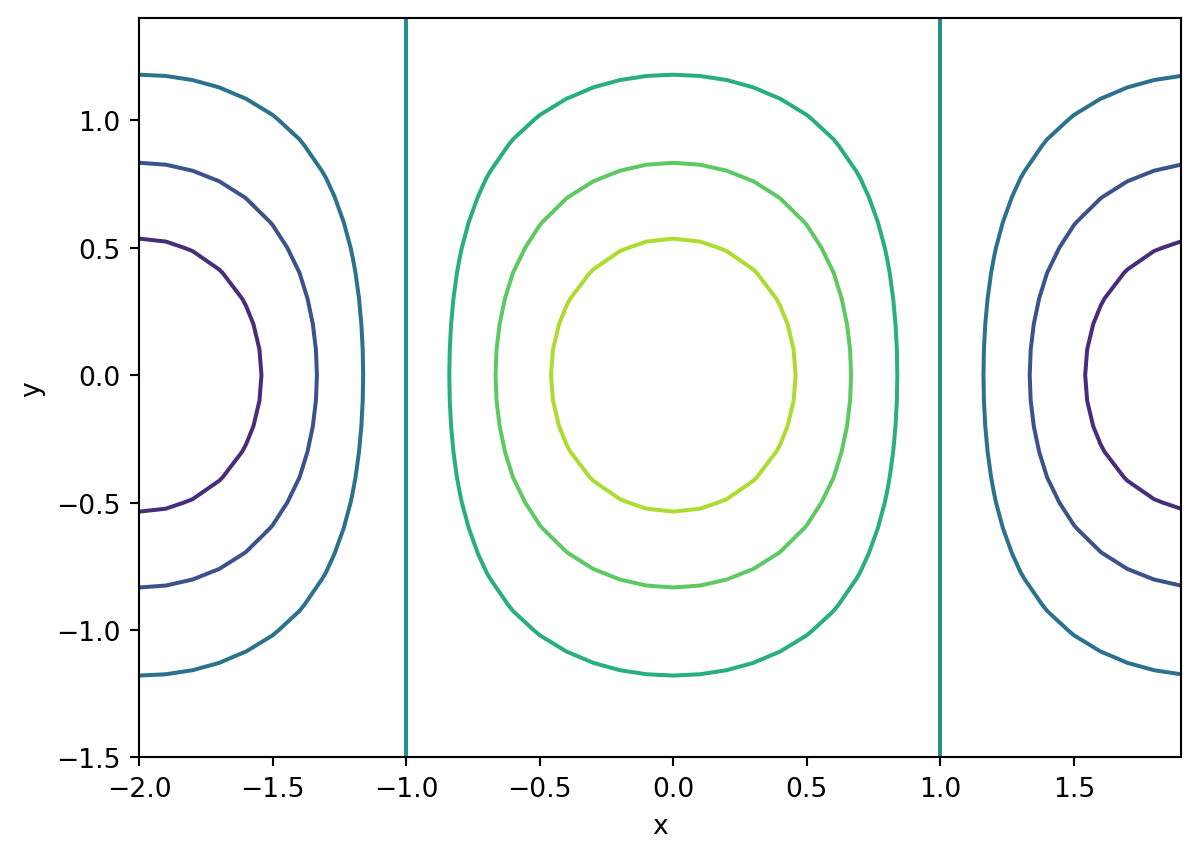

In [7]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

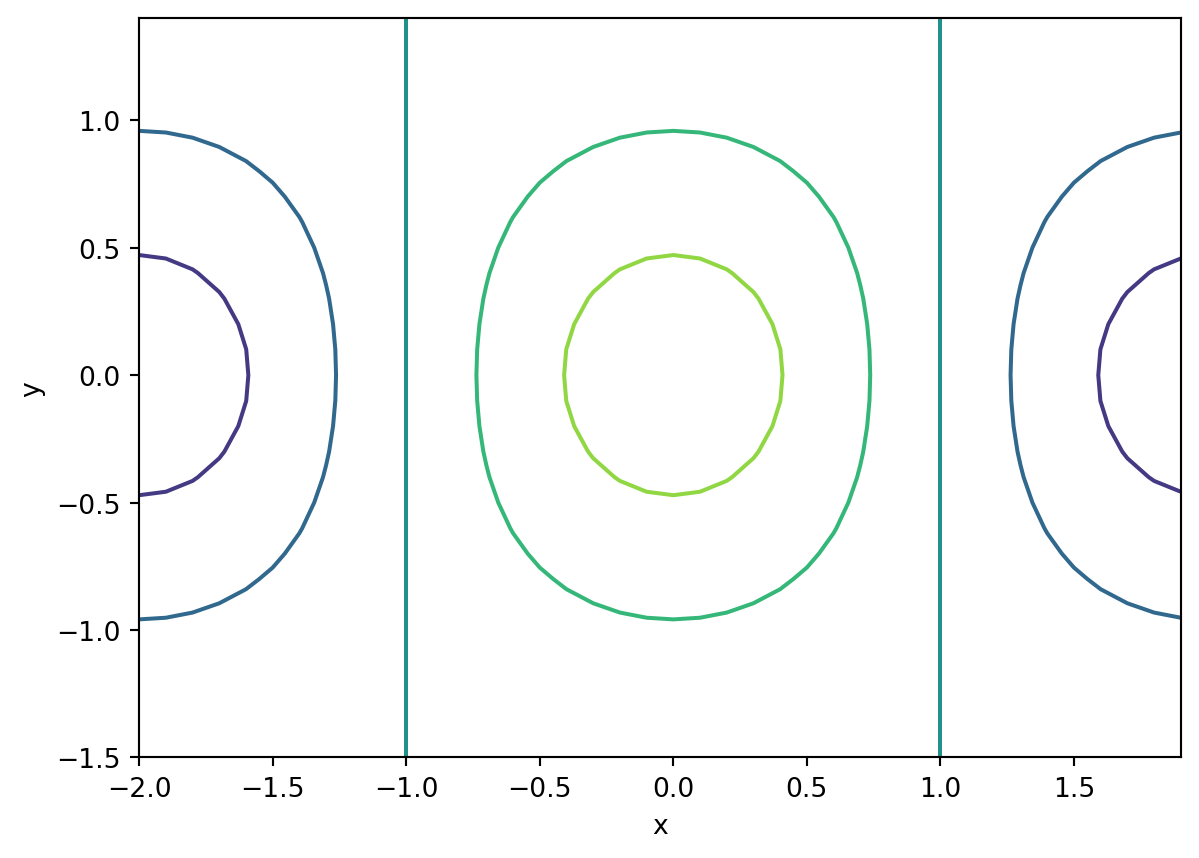

In [8]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F,levels = 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

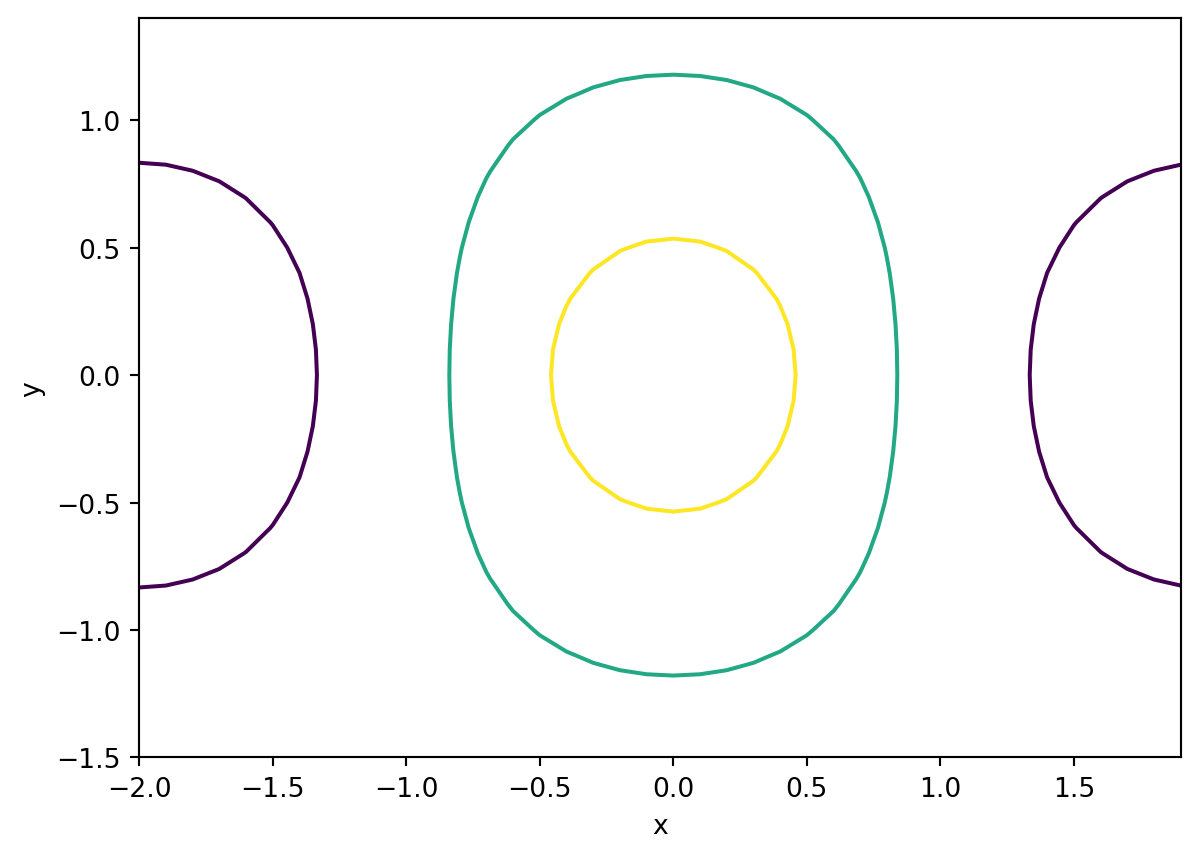

In [9]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F,levels = [-0.5,0.25,0.75])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

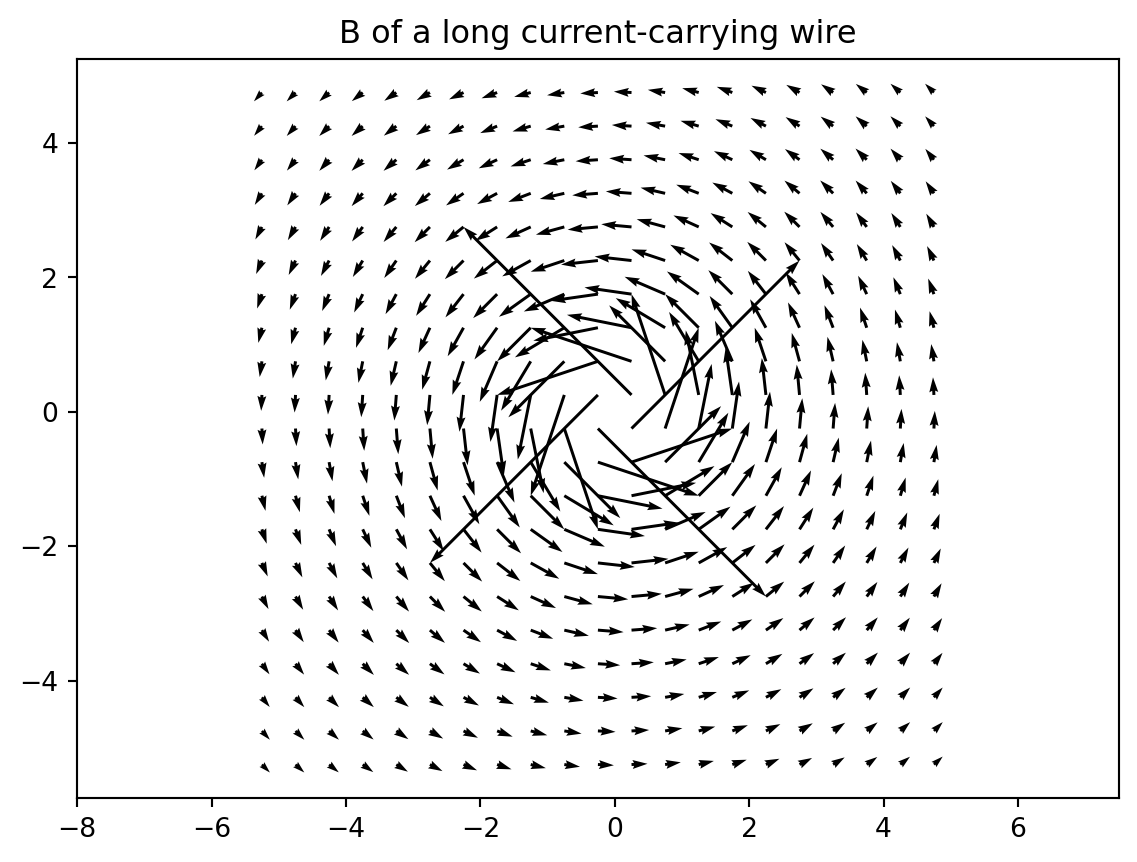

In [10]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx,By)
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


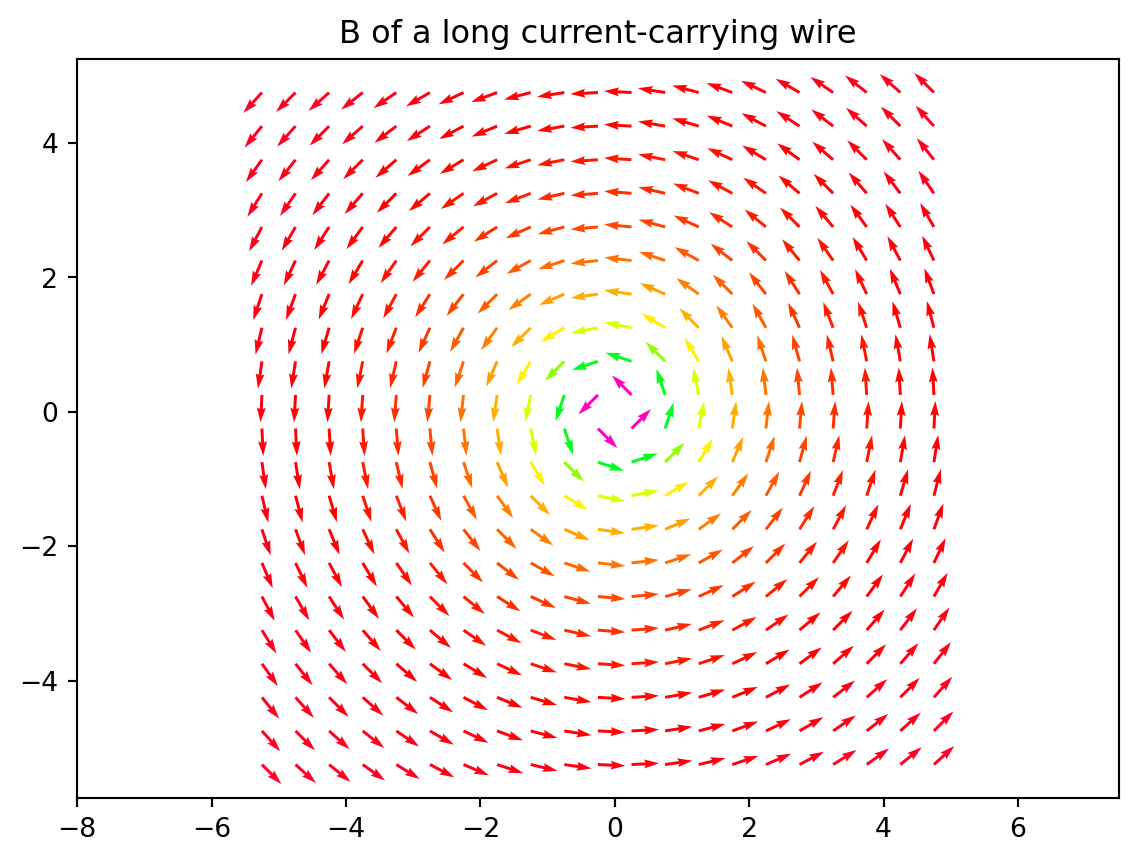

In [11]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
B = sqrt(Bx**2 + By**2)  # Find the magnitude of the vectors.
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx/B,By/B,B,cmap="gist_rainbow")  # Divide by magnitude to make them equal to 1
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


In [12]:
#| eval: false
#| 
from numpy import arange,sin,cos
from matplotlib import pyplot as plt
%matplotlib

t=0
x = arange(0,5,0.01) #Domain over which I want to plot the function.
while t < 10:
    y=sin(5*x-3*t)*cos(2*x) #Constructarrayoffunction
                                         # values at current time.
    pyplot.clf()  # Clear the canvas, otherwise all plots end up on
                  # top of each other
    pyplot.plot(x,y,'r-',linewidth=3)
    pyplot.xlabel('x')
    pyplot.ylabel('f(x)')
    pyplot.title('t = {:.4f}'.format(t))
    pyplot.draw()
    pyplot.pause(0.01)
    t += .1
# draw the plot, but don't wait for
# someone to close the window.
# Wait before plotting the next one.
# Advance time.

In [13]:
# Python code here

In [14]:
# Python code here

In [15]:
# Python code here

In [16]:
# Python code here